<a href="https://colab.research.google.com/github/saileepanchbhai/Advance-Machine-Learning-Lab/blob/main/TSA_1_Implementing_Dickey_Fuller_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import matplotlib for data visualization and plotting graphs
import matplotlib.pyplot as plt

# Import Augmented Dickey-Fuller (ADF) test function to check stationarity of time series data
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Import files module from Google Colab to upload local files
from google.colab import files

# Open file upload dialog to select dataset from local system
uploaded = files.upload()

# Loop through uploaded files and display file name and size
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AirPassengers.csv to AirPassengers (1).csv
User uploaded file "AirPassengers (1).csv" with length 1746 bytes


In [ ]:
# Read the AirPassengers dataset from CSV file into a pandas DataFrame
df = pd.read_csv('AirPassengers.csv')

# Display the first 5 rows of the dataset to understand its structure
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [ ]:
# Convert the 'Month' column into datetime format for time series analysis
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' column as the index of the DataFrame
# This is important for time series operations and plotting
df.set_index('Month', inplace=True)

# Display the first 5 rows to verify changes
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


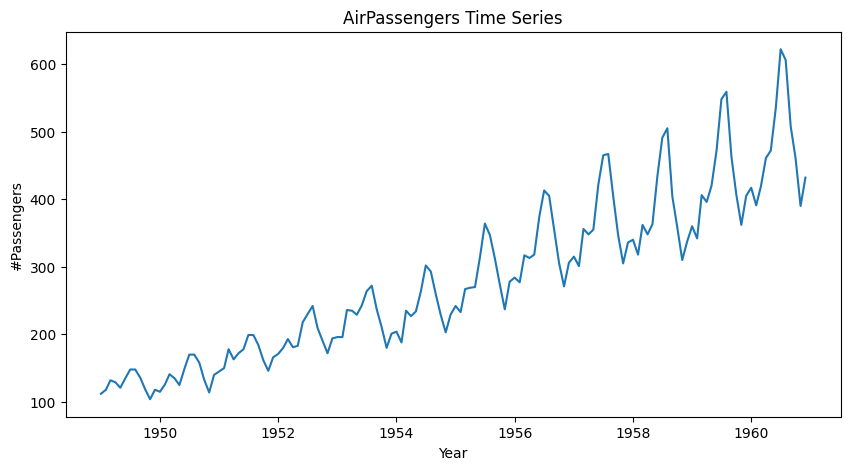

In [ ]:
# Create a figure with specified size (width=10, height=5)
plt.figure(figsize=(10,5))

# Plot the number of passengers over time
plt.plot(df['#Passengers'])

# Add title to the graph
plt.title("AirPassengers Time Series")

# Label the x-axis as Year (time)
plt.xlabel("Year")

# Label the y-axis as Number of Passengers
plt.ylabel("#Passengers")

# Display the plot
plt.show()

In [ ]:
# Apply Augmented Dickey-Fuller (ADF) test to check stationarity
result = adfuller(df['#Passengers'])

# Print the ADF test statistic value
print("ADF Statistic:", result[0])

# Print the p-value of the test
print("p-value:", result[1])

# Print the critical values at different confidence levels (1%, 5%, 10%)
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key} : {value}")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1% : -3.4816817173418295
   5% : -2.8840418343195267
   10% : -2.578770059171598


In [ ]:
# Check if p-value is less than 0.05 (5% significance level)
if result[1] < 0.05:

    # If true → Reject null hypothesis (series has no unit root)
    # Therefore, the time series is stationary
    print("The series is Stationary")
else:

    # If false → Fail to reject null hypothesis
    # Therefore, the time series is not stationary
    print("The series is NOT Stationary")

The series is NOT Stationary


In [ ]:
# Apply first-order differencing to remove trend and make the series stationary
df_diff = df['#Passengers'].diff().dropna()

# Apply ADF test again on differenced data
result_diff = adfuller(df_diff)

# Print results after differencing
print("After Differencing:")
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])

After Differencing:
ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
